In [123]:
import pandas as pd
from pathlib import Path
import gzip
import matplotlib.pyplot as plt
import boto3

%matplotlib inline

In [124]:
! aws s3 cp --recursive --quiet s3://home-streams .  

In [125]:
path = Path('2019')
s3 = boto3.resource('s3')

In [129]:
dfs = []
for p in path.glob("**/*.*gz"):
    try:
        _df = pd.read_json(p, lines=True, compression='gzip')
    except:
        print(p)
    else:
        dfs.append(_df)
df = pd.concat(dfs)

2019/12/09/13/home-1-2019-12-09-13-11-49-02e6e8de-8747-4049-b34f-063827c7837f.gz


In [130]:
df['datetime'] = pd.to_datetime(df.time, unit='s')

In [131]:
tmp = df.set_index('datetime').resample('1min')[['moisture-level', 'humidity', 'temperature', 'pressure', 'gas', 'distance-to-water-surface']].mean()

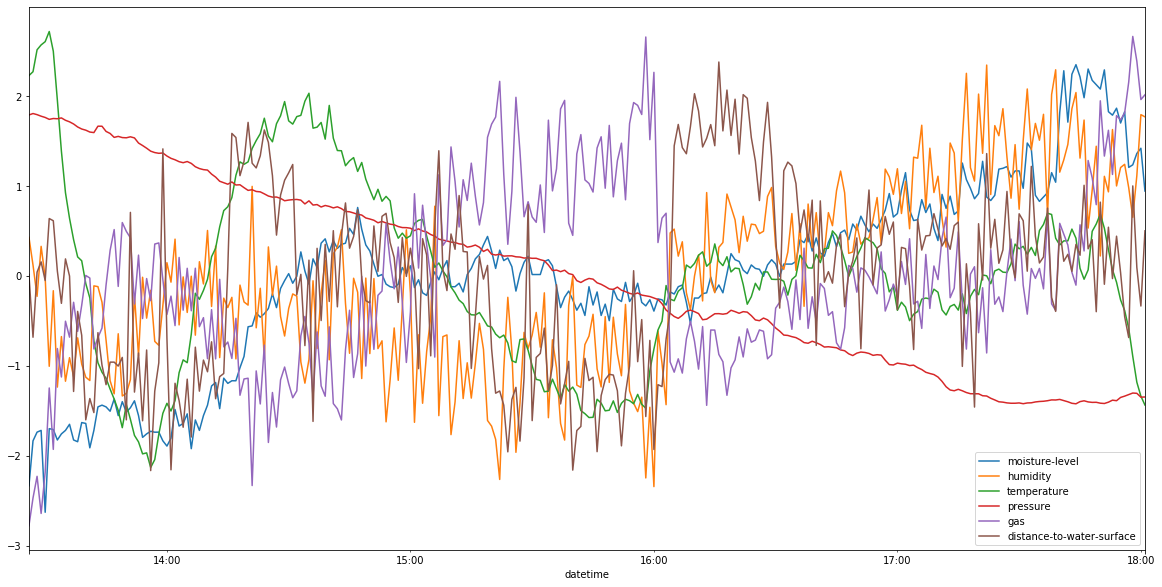

In [132]:
((tmp - tmp.mean()) / tmp.std()).plot(figsize=(20,10))